# General Tutorial 

In [1]:
%matplotlib widget
import os
import matplotlib.pyplot as plt
import numpy as np

import agnfitlab
import agnfitlab.models as models

In [2]:
spec = agnfitlab.spectrum.read_text(filename='SDSS_spec-2770-54510-0433.txt',
                                    ra=208.95919,
                                    dec=20.770705,
                                    z=0.19653657)

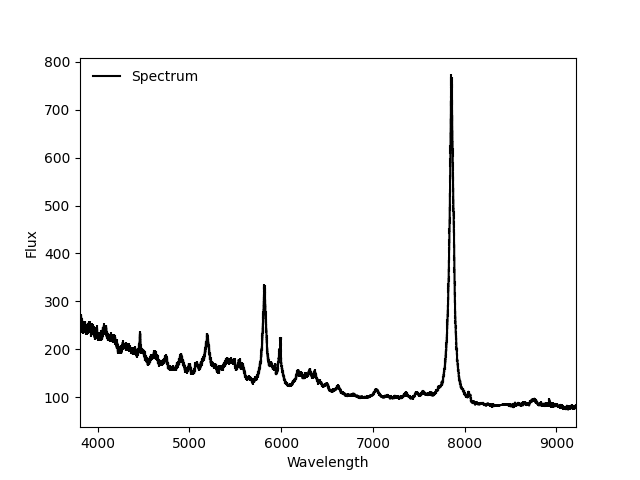

In [3]:
spec.plot_spectrum()

In [4]:
spec.wave.min()

3808.699463

In [5]:
spec.DeRedden()
spec.zCorrection()

In [6]:
hostdec = agnfitlab.HostDecompose(spec)

In [7]:
hostdec.fit()

The host contribution might be negligible or the fit is not good.


Warning! The decomposition was not successful.


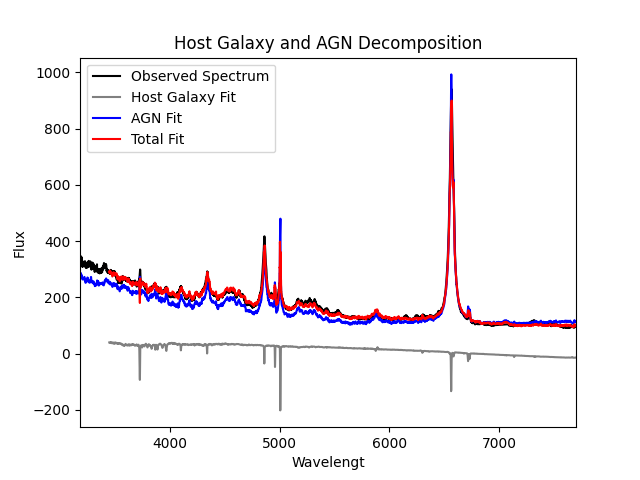

In [8]:
hostdec.plot_decomposition()

In [9]:
spec = agnfitlab.spectrum.read_text(filename='GAMA_G09_Y1_GS1_080.txt',
                                    ra=137.89346,
                                    dec=-0.86514,
                                    z=0.05488)

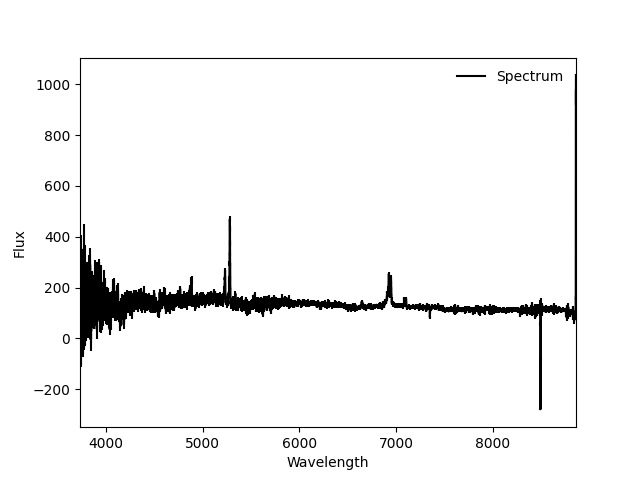

In [10]:
spec.plot_spectrum()

In [11]:
spec.DeRedden()
spec.zCorrection()

In [12]:
hostdec = agnfitlab.HostDecompose(spec)

In [13]:
mask = hostdec.default_mask_regions
mask = agnfitlab.tools.get_mask(spec.wave, mask)

In [14]:
hostdec.fit()

In [15]:
hostdec.fit_redchi2

1.4958387603290393

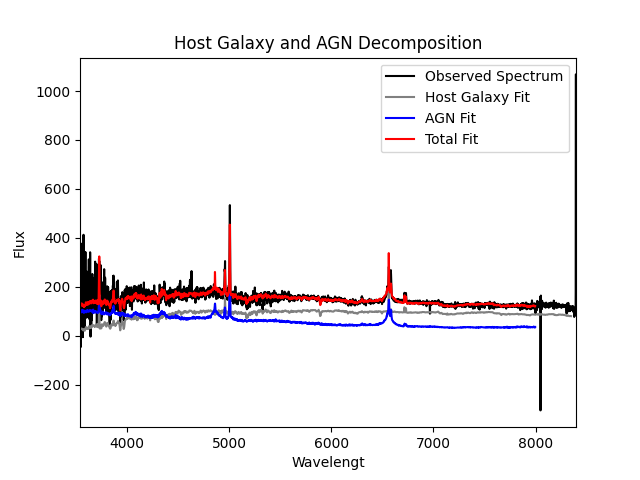

In [16]:
hostdec.plot_decomposition()

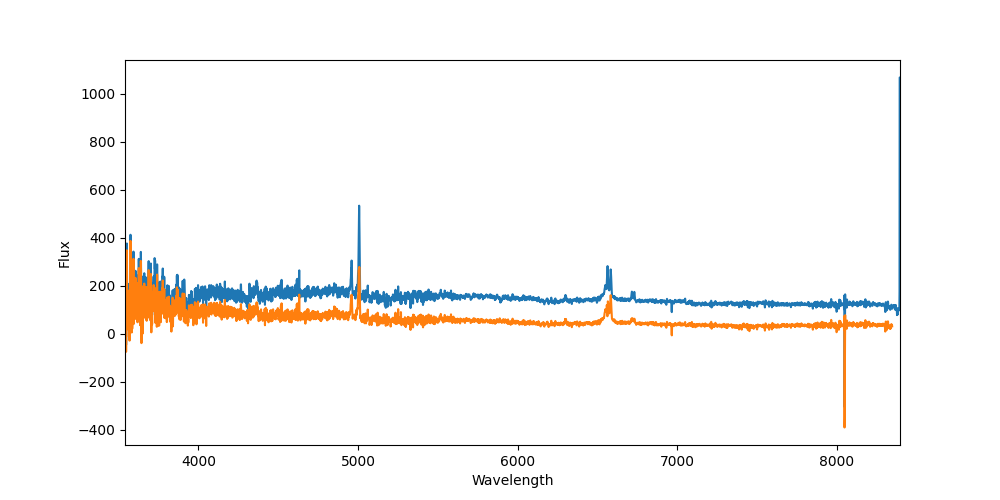

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(spec.wave, spec.flux, label='Observed Spectrum')
plt.plot(spec.wave, spec.agn, label='AGN Model')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()

In [18]:
# # If satisfied with the decomposition set the flux as the AGN flux
# spec.flux = spec.agn

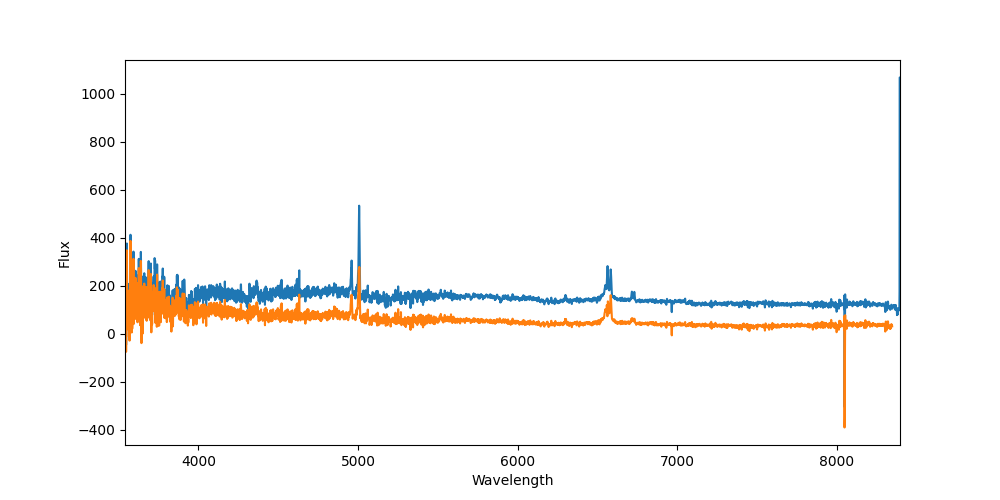

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(spec.wave, spec.flux, label='Observed Spectrum')
plt.plot(spec.wave, spec.agn, label='AGN Model')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()

## Modeling

In [20]:
spec = agnfitlab.spectrum.read_text(filename='SDSS_spec-2770-54510-0433.txt',
                                    ra=208.95919,
                                    dec=20.770705,
                                    z=0.19653657)
spec.DeRedden()
spec.zCorrection() 

In [21]:
spec.crop(wbounds=(4000, 8000))

In [22]:
agnfitlab.models.init_lines_csv(wmin=np.min(spec.wave), wmax=np.max(spec.wave))

Directory ./aux already exists.


In [23]:
continuum = models.BrokenPowerlaw(name='continuum',
                                  w_ref=np.mean(spec.wave),
                                  amp=np.median(spec.flux))

blr_h = models.TiedGaussLines(files=['hydrogen.csv'], name='blr_h',
                              fwhm=3000, min_fwhm=1000, max_fwhm=5000)

blr_he = models.TiedGaussLines(files=['helium.csv'], name='blr_he',
                               fwhm=3000, min_fwhm=1000, max_fwhm=5000)

nlr = models.TiedGaussLines(files=['oiii_nii.csv', 'narrow_basic.csv', 'hydrogen.csv'], name='nlr',
                               fwhm=1000, min_fwhm=900, max_fwhm=1200,
                               offset=150, min_offset=0, max_offset=300)
getattr(nlr, "amp_[OIII]_4959").link = 1/3. * getattr(nlr, "amp_[OIII]_5007")
getattr(nlr, 'amp_[NII]_6548').link = 1/3. * getattr(nlr, 'amp_[NII]_6583')

femodel = models.GaussFeII(name='femodel',
                           fwhm=1800, min_fwhm=1000, max_fwhm=2000,
                           offset=0, min_offset=-3000, max_offset=3000)

In [24]:
model = continuum + blr_h + blr_he + nlr + femodel
model

<BinaryOpModel model instance 'continuum + blr_h + blr_he + nlr + femodel'>

In [25]:
flux = spec.flux.copy()
spec.flux[(spec.wave > 5000) & (spec.wave < 6000)] = np.nan
spec.fluxerr[(spec.wave > 5000) & (spec.wave < 6000)] = np.nan

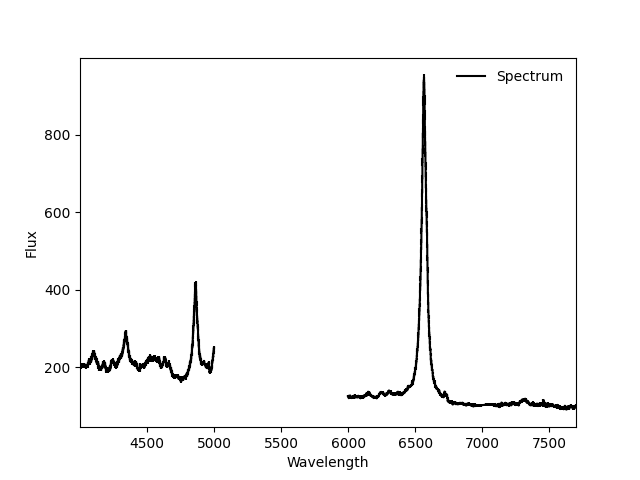

In [26]:
spec.plot_spectrum()

In [27]:
fit = spec.fit(model, ntrial=2)

Iteration: 1
Iteration: 2


In [28]:
model

<BinaryOpModel model instance 'continuum + blr_h + blr_he + nlr + femodel'>

In [29]:
# put the flux value between 5000 and 6000 to nan fot testing
flux = spec.flux.copy()
flux[(spec.wave > 5000) & (spec.wave < 6000)] = np.nan

In [30]:
spec.flux

array([202.88019973, 201.90927339, 203.91810977, ..., 101.04248891,
       100.4858959 , 101.64157819])

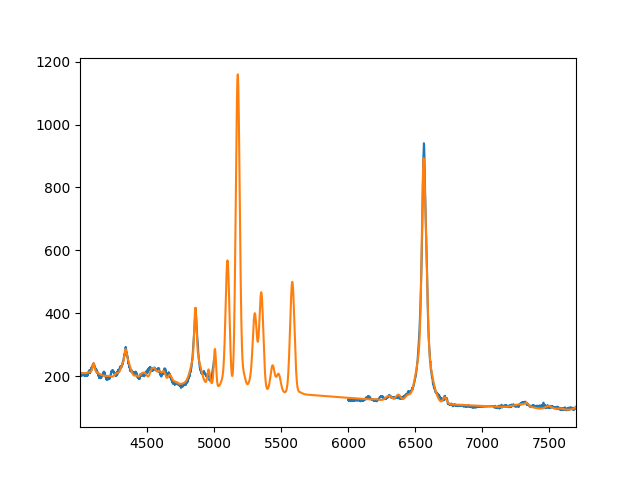

In [31]:
plt.figure()
plt.plot(spec.wave, spec.flux, label='Observed Spectrum with NaN')
plt.plot(spec.wave, spec.model(spec.wave), label='Original Flux')
plt.show()

In [32]:
spec.model(flux)

array([ 5223.37587117,  5250.45023993,  5194.72978969, ...,
       11071.54124091, 11137.64559219, 11001.23002043])

In [33]:
# spec.mc_resampling(nsample=100)

In [34]:
# spec.mc_resampling(nsample=10, ncpu=1)